contractor 2570
fulltime 8242
internship 85
parttime 122


C:\Users\Thilo\AppData\Local\Temp\ipykernel_20808\4252259806.py:55: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


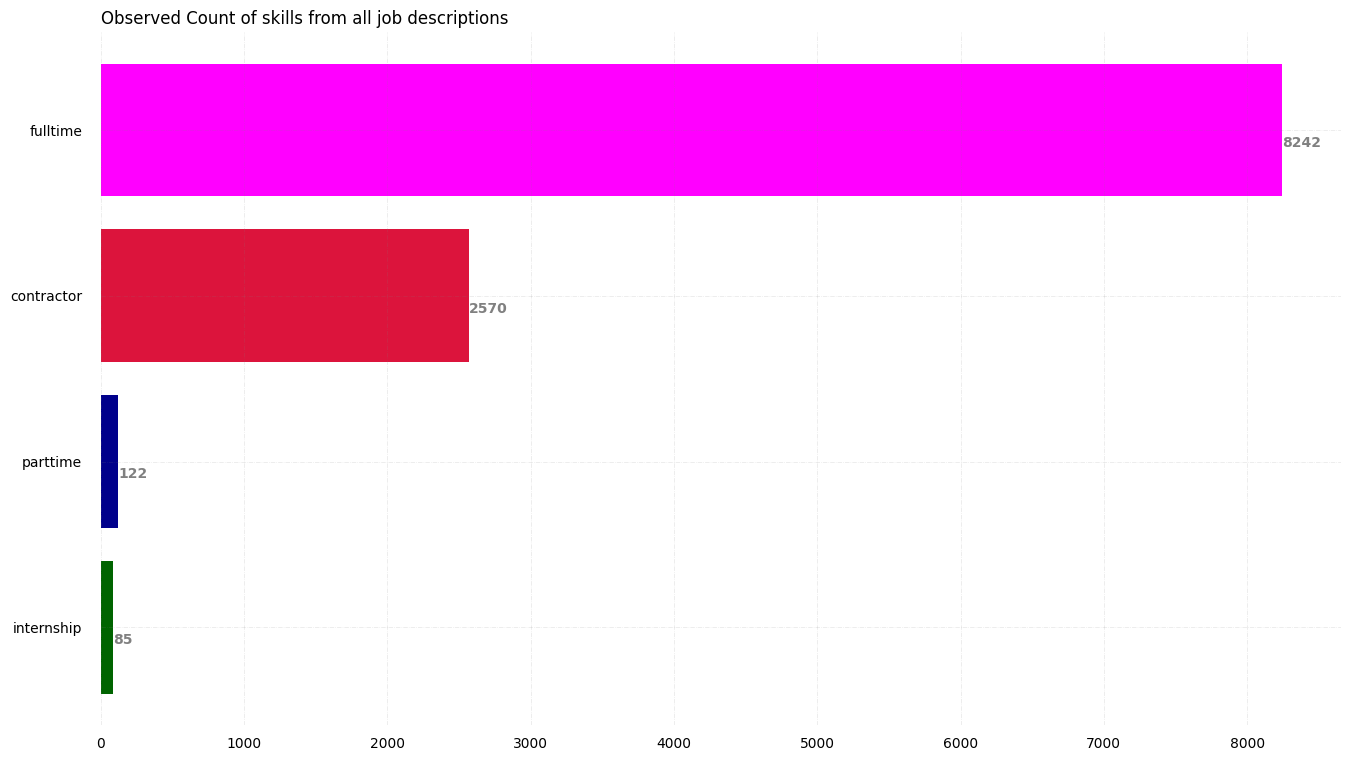

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import re
frequency = {}
document_text = open('schedule.txt', 'r')
text_string = document_text.read().lower()
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    
frequency_list = frequency.keys()
for words in frequency_list:
    print(words, frequency[words])



list = frequency

df=pd.DataFrame([list])

df1=pd.melt(df)


df1.columns = [
    'Schedule',
    'Count',
]

df1=df1.sort_values(by=['Count'],ascending=False)

df_plot=df1.head(10)


Count = df_plot['Count']
Skill = df_plot['Schedule']
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(Skill, Count,color= ["#ff00ff","#dc143c","#00008b","#006400","#ff1493", "#adff2f","#cd5c5c","#ff7f50", "#ff8c00", "#483d8b"])
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title('Observed Count of skills from all job descriptions',
             loc ='left', )
plt.show()





